In [2]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10,10,1000)

In [3]:
v0,r,c,w,w0,T,t,k,l=symbols('V_0,R,C,\omega, omega_0, T,t,k,l')

In [4]:
H = 1/(r*c*w*I+1)
H

1/(I*C*R*\omega + 1)

上面的$H(j\omega)$被称为转移函数，反映了滤波器对频率的选择性，和电磁学里的复阻抗类似。

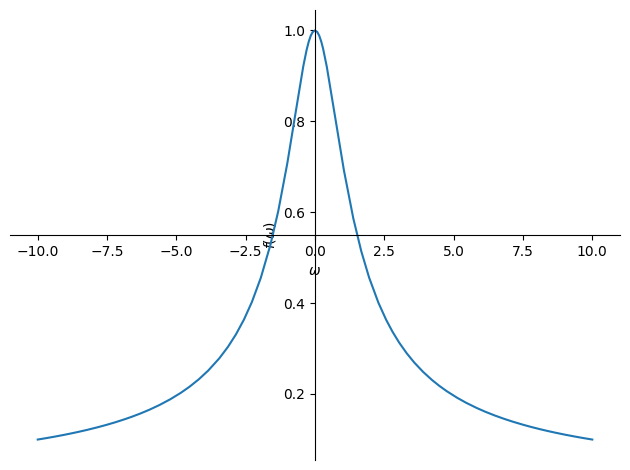

In [5]:
para={r:1,c:1}
plot(Abs(H).subs(para))

下面显示的是输入信号 $V_0|\cos (\omega t)|$ 的Fourier 级数展开式的系数，$c_n$，求解方法按定义逐项积分求系数就好了。

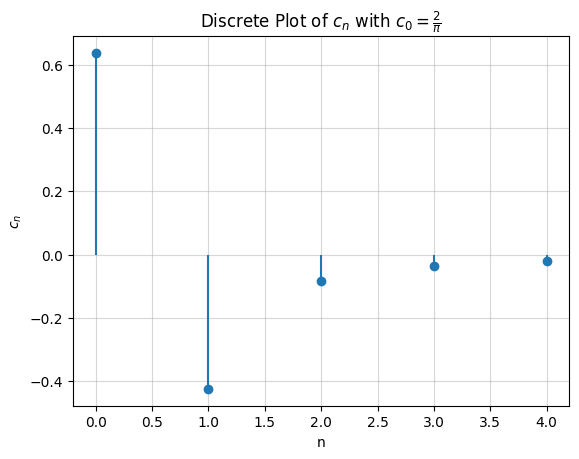

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Define the series with special case for n = 0
def cn(n):
    if n == 0:
        return 2 / np.pi
    return (-4/(np.pi*((2*n)**2-1)))

# Create a range of discrete values for n
n_values = np.arange(0, 5)  # Include n = 0
cn_values = [cn(n) for n in n_values]  # Compute cn for each n

# Plot the series
plt.stem(n_values, cn_values, basefmt=" ")
plt.xlabel('n')
plt.ylabel('$c_n$')
plt.title('Discrete Plot of $c_n$ with $c_0 = \\frac{2}{\\pi}$')
plt.grid(alpha=0.5)



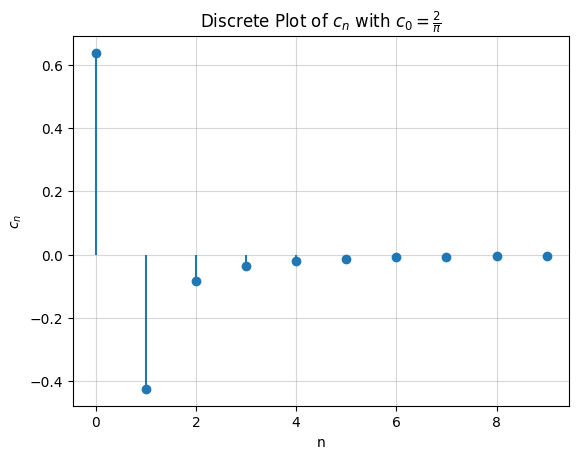

In [14]:
n_values = np.arange(0, 10)  # Include n = 0
cn_values = [cn(n) for n in n_values]  # Compute cn for each n

# Plot the series
plt.stem(n_values, cn_values, basefmt=" ")
plt.xlabel('n')
plt.ylabel('$c_n$')
plt.title('Discrete Plot of $c_n$ with $c_0 = \\frac{2}{\\pi}$')
plt.grid(alpha=0.5)

余弦成分按照频率 $\frac{1}{n^2}$ 迅速衰减，直流分量是基波（第一个余弦波）的 $\frac{3}{2}$ 倍。

于此同时，滤波器是低通滤波器，随频率按照 $\frac{1}{\omega}$衰减。

不如只保留直流分量，和前两个交流分量。

In [15]:
fourier_series(Abs(sin(t)))

FourierSeries(Abs(sin(t)), (t, -pi, pi), (2/pi, SeqFormula(Piecewise((0, Eq(_n, -1) | Eq(_n, 1)), (-2*cos(_n*pi)/(_n**2 - 1) - 2/(_n**2 - 1), True))*cos(_n*t)/pi, (_n, 1, oo)), SeqFormula(0, (_k, 1, oo))))

举个例子估计一下（想必不准）

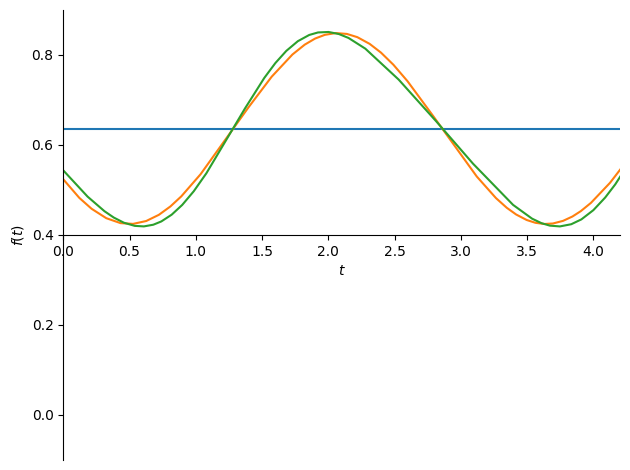

In [51]:
f1 = 2/pi
f2 = -4/(3*pi)*(1/2)*cos(2*t-1)
f3 = -4/(15*pi)*(1/4)*cos(4*t-3.5)

plot(f1,f1+f2,f1+f2+f3,ylim=(-0.1,0.9),xlim=(0,4.2))